In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [4]:
df = pd.read_csv(r'C:\Users\USER\Downloads\Researchs on Mortality Prediction in ICU\Mortality Prediction in ICU\train.csv', encoding = 'utf-8')

In [5]:
labels = pd.read_csv(r'C:\Users\USER\Downloads\Researchs on Mortality Prediction in ICU\Mortality Prediction in ICU\\labels.csv', encoding = 'utf-8')

In [6]:
labels.shape

(3999, 1)

In [7]:
labels["In-hospital_death"].value_counts()

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [8]:
#One Hot encoding
temp  =[]
for i in labels["In-hospital_death"]:
  if i == 0:
    temp.append([1,0])
  else:
    temp.append([0,1])
temp = np.array(temp)

In [9]:
print(temp.shape)


(3999, 2)


In [10]:
new = pd.concat([df , labels] , axis = 1)
print(new.shape)

(3999, 43)


In [11]:
# df = new
# df = df.drop(['Gender','Cholesterol','HCT','ICUType','Height'] , axis =1)

In [12]:
df = new
X = df.drop("In-hospital_death", axis=1)
y = df["In-hospital_death"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Creating the gradient boosting model
model = GradientBoostingClassifier()

# Training the model on the training set
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [15]:
# Predicting the labels for the testing set
y_pred = model.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.87
Precision: 0.52
Recall: 0.20
F1 score: 0.29


In [17]:
from sklearn.metrics import roc_auc_score

# predict probabilities of positive class
y_pred_prob = model.predict_proba(X_test)[:,1]

# calculate AUROC score
auroc = roc_auc_score(y_test, y_pred_prob)
print("AUROC score: {:.3f}".format(auroc))


AUROC score: 0.815


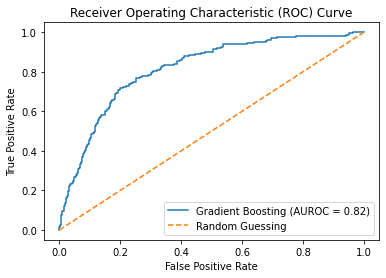

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# predict probabilities of positive class
y_pred_prob = model.predict_proba(X_test)[:,1]

# calculate AUROC score
auroc = roc_auc_score(y_test, y_pred_prob)

# calculate false positive rate, true positive rate and threshold for ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

# plot ROC curve
plt.plot(fpr, tpr, label='Gradient Boosting (AUROC = {:.2f})'.format(auroc))
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
